In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from matplotlib import cm

In [16]:
df = pd.read_csv("original-30.csv")

In [17]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [18]:
x = df.iloc[:, 1:-1].values # Select features
y = df.iloc[:, -1]
genres = y.unique()

In [19]:
x = StandardScaler().fit_transform(x)

In [36]:
# pca_2d = PCA(n_components=2)
pca_2d = KernelPCA(n_components=2, kernel='cosine')
principal_components_2d = pca_2d.fit_transform(x)
principal_components_2d_df = pd.DataFrame(data = principal_components_2d, columns = ["pca1", "pca2"])
final_2d_df = pd.concat([principal_components_2d_df, y], axis=1)

NameError: name 'targets' is not defined

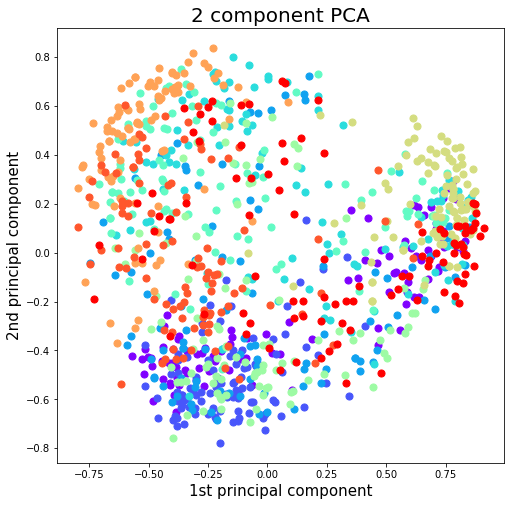

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('1st principal component', fontsize = 15)
ax.set_ylabel('2nd principal component', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = cm.rainbow(np.linspace(0, 1, len(genres)))

for genre, color in zip(genres, colors):
    to_keep = final_2d_df["label"] == genre
    
    ax.scatter(final_2d_df.loc[to_keep, "pca1"], final_2d_df.loc[to_keep, "pca2"], color = color, s = 50)

ax.legend(targets)
ax.grid()

In [ ]:
# pca_3d = PCA(n_components=3)
pca_3d = KernelPCA(n_components=3, kernel='rbf')
principal_components_3d = pca_3d.fit_transform(x)
principal_components_3d_df = pd.DataFrame(data = principal_components_3d, columns = ["pca1", "pca2", "pca3"])
final_3d_df = pd.concat([principal_components_3d_df, y], axis=1)

NameError: name 'targets' is not defined

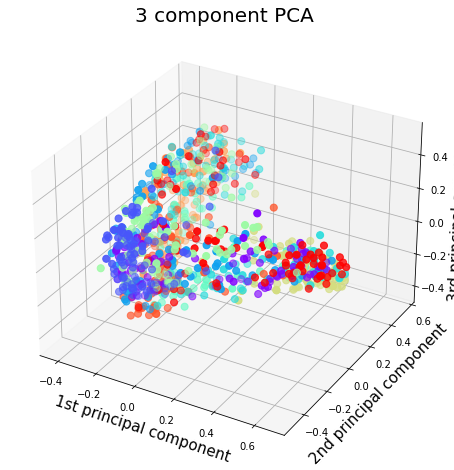

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection="3d") 

ax.set_xlabel('1st principal component', fontsize = 15)
ax.set_ylabel('2nd principal component', fontsize = 15)
ax.set_zlabel('3rd principal component', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

colors = cm.rainbow(np.linspace(0, 1, len(genres)))

for genre, color in zip(genres, colors):
    to_keep = final_3d_df["label"] == genre
    
    ax.scatter(final_3d_df.loc[to_keep, "pca1"], final_3d_df.loc[to_keep, "pca2"], final_3d_df.loc[to_keep, "pca3"], color = color, s = 50)

ax.legend(targets)
ax.grid()

In [39]:
final_2d_df.to_csv("pca_2d_kernel.csv", index = False)

In [40]:
final_3d_df.to_csv("pca_3d_kernel.csv", index = False)